In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy import stats
from scipy import signal
from statistics import variance
import seaborn as sns
from scipy.fft import fft
import os

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,acoustic_data,time_to_failure
0,12,1.4691
1,6,1.4691
2,8,1.4691
3,5,1.4691
4,8,1.4691


In [4]:
train.describe()

,acoustic_data,time_to_failure
count,6.291455e+08,6.291455e+08
mean,4.519468e+00,5.678292e+00
std,1.073571e+01,3.672697e+00
min,-5.515000e+03,9.550396e-05
25%,2.000000e+00,2.625997e+00
50%,5.000000e+00,5.349798e+00
75%,7.000000e+00,8.173396e+00
max,5.444000e+03,1.610740e+01


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629145480 entries, 0 to 629145479
Data columns (total 2 columns):
 #   Column           Dtype  
---  ------           -----  
 0   acoustic_data    int64  
 1   time_to_failure  float64
dtypes: float64(1), int64(1)
memory usage: 9.4 GB


### It is not possible to plot graph of every data that we have collected. That’s why I decided to show only 25K data

## For Performing EDA I use some codes from my old Haberman Assignment

## Density Plot

<AxesSubplot:ylabel='Density'>

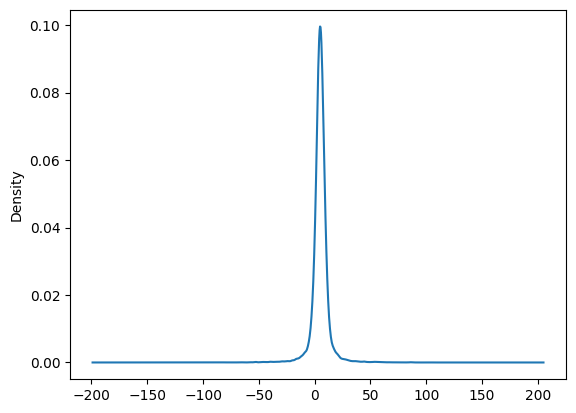

In [4]:
train['acoustic_data'][:25000].plot(kind='density')

## Observation
#### 1) Majority value lie between -10 to 10 approximately.
#### 2) And we can clearly see that outliers are present in both direction.

<AxesSubplot:ylabel='Density'>

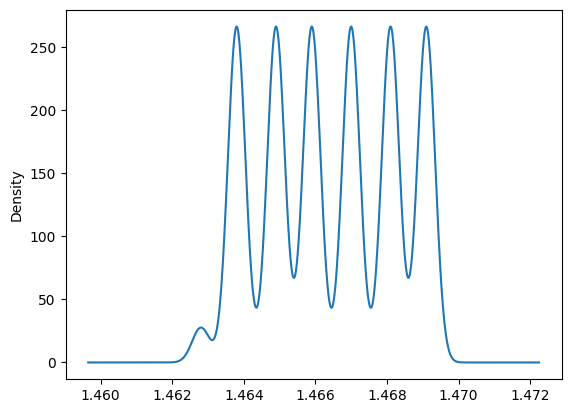

In [5]:
train['time_to_failure'][:25000].plot(kind='density')

## Observation
#### 1) The density of target data start increasing after 1.462 approx at 1.463 it increases.
#### 2) The density of 1.464, 1.466, 1.468, 1.470 are constant and high.

## Box Plot

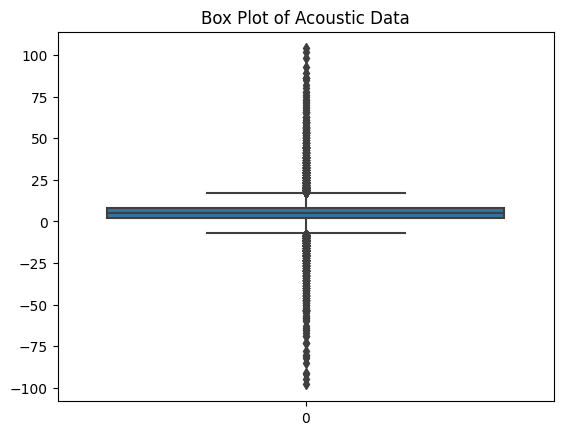

In [6]:
sns.boxplot(data=train['acoustic_data'][:25000])
plt.title("Box Plot of Acoustic Data")
plt.show()

### Observation
#### 1) As we can see there is outliers present in our data.
#### 2) 25%,50% and 75% are present between -15 to 15.

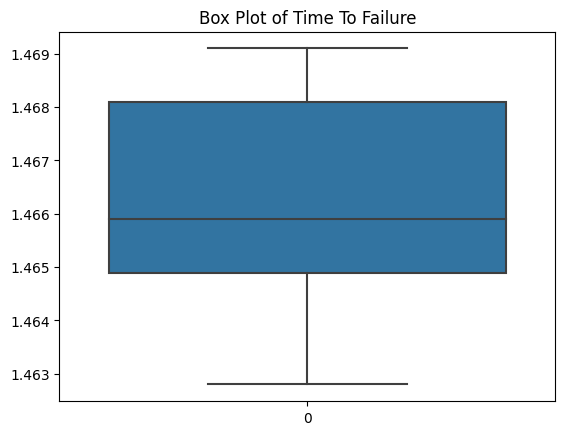

In [7]:
sns.boxplot(data=train['time_to_failure'][:25000])
plt.title("Box Plot of Time To Failure")
plt.show()

## Observation
#### 1) There is no outlier present in our target features.
#### 2) 25% of target have < 1.465 time to failure.
#### 3) 50% of target have < 1.466 time to failure.
#### 4) 75% of taget have < 1.468 time to failure.

## Histogram

<AxesSubplot:xlabel='acoustic_data', ylabel='Count'>

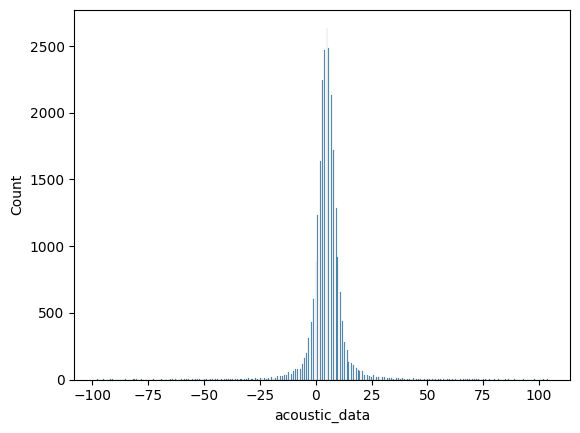

In [8]:
sns.histplot(train['acoustic_data'][:25000])

## Observation
#### 1) As we can see we have outliers in both direction from -25 to -100 and 25 to 100.
#### 2) our major data lie between -10 to 10 approximately.

<AxesSubplot:xlabel='time_to_failure', ylabel='Count'>

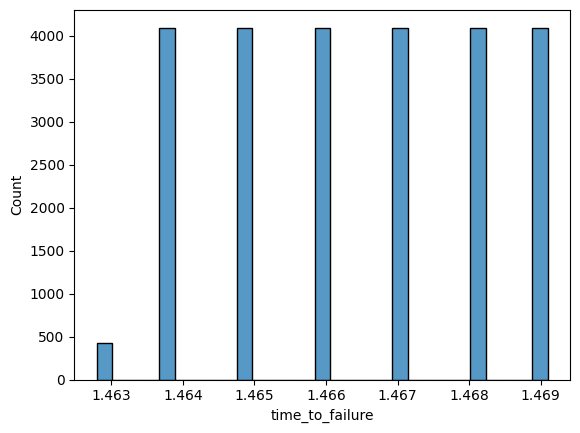

In [9]:
sns.histplot(train['time_to_failure'][:25000])

## Observation
#### 1) As we can see count of 1.463 is smaller in comparision to others.
#### 2) Except 1.463 all rows have equal counts.

## With the help of this research paper (https://www.irjet.net/archives/V8/i5/IRJET-V8I5574.pdf) I learn to plot these below 3 plots.

## Acoustic Data, plotted against time

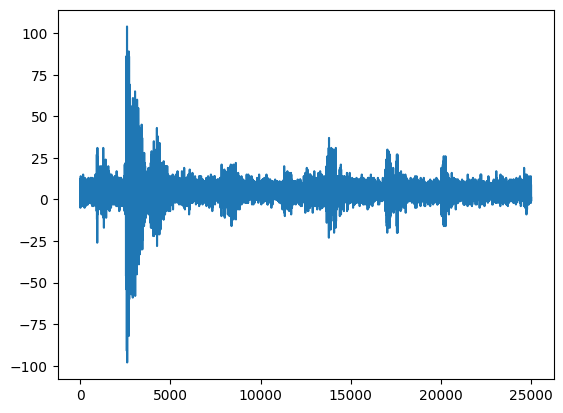

In [10]:
#https://www.geeksforgeeks.org/plotting-various-sounds-on-graphs-using-python-and-matplotlib/
plt.plot(train['acoustic_data'][:25000])

## observation
#### The acoustic data shows very complex oscillations with variable amplitude

Text(0, 0.5, 'Time To Failure')

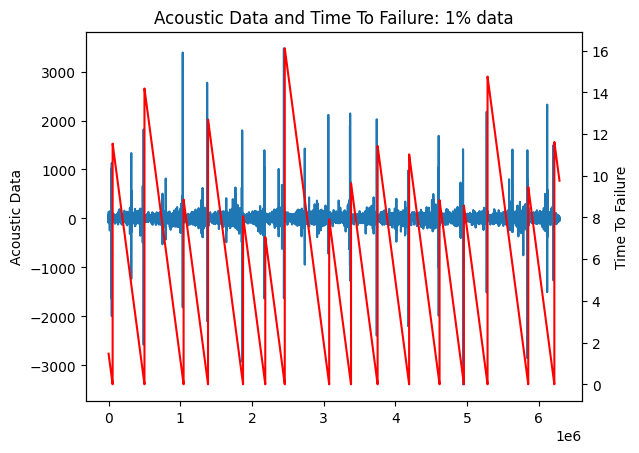

In [11]:
#https://www.geeksforgeeks.org/matplotlib-axes-axes-twinx-in-python/
fig, axis1 = plt.subplots()
plt.title("Acoustic Data and Time To Failure: 1% data")
plt.plot(train['acoustic_data'].values[::100])     #we take stepsize 100 like 1% of 1K is 10 if we take stepsize 100 for total data than we can easily take 1%
axis1.set_ylabel('Acoustic Data')
axis2 = axis1.twinx()
plt.plot(train['time_to_failure'].values[::100], color='red')
axis2.set_ylabel('Time To Failure')

## Observation
#### 1) For observation we just take 1% data by taking step size 100.
#### 2) As we can see that just before each failure there's an amplitude rise in the acoustic data. 

Text(0, 0.5, 'Time to failure')

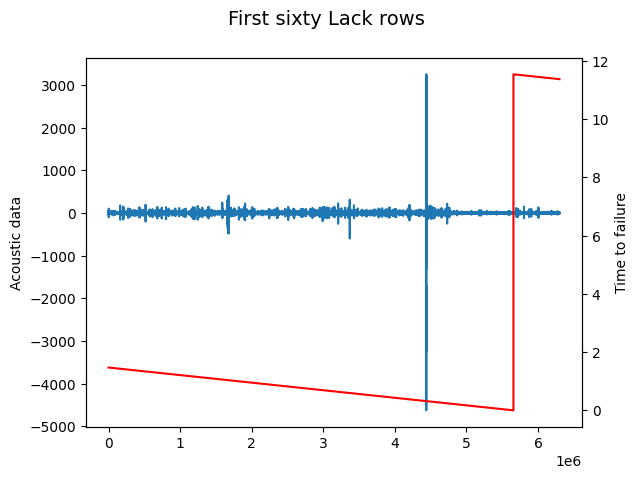

In [12]:
fig, axis1 = plt.subplots()
fig.suptitle('First sixty Lack rows', fontsize=14) 
plt.plot(train['acoustic_data'][:6300000])   #The 1% of train data is approximately 6291454.8 so I take 63 Lack rows
axis1.set_ylabel('Acoustic data')
axis2 = axis1.twinx() 
plt.plot(train['time_to_failure'][:6300000],color='r')
axis2.set_ylabel('Time to failure')

## observation
#### 1) We zoomed in this 1% time plot. Now ,we are able to see that really the massive oscillation before the failure isn't quite within the last moment.
#### 2) There are a chain of high frequency oscillations before the big one, and also some low amplitude peaks following it.
#### 3) This is again followed by some minor oscillations before the occurrence of failure.

## EDA on Test Data

In [13]:
test = pd.read_csv('Test\seg_00a37e.csv')

In [14]:
test.head()

,acoustic_data
0,-2
1,1
2,6
3,7
4,8


In [15]:
test.describe()

,acoustic_data
count,150000.000000
mean,3.861213
std,6.927027
min,-138.000000
25%,1.000000
50%,4.000000
75%,7.000000
max,162.000000


In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 1 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   acoustic_data  150000 non-null  int64
dtypes: int64(1)
memory usage: 1.1 MB


<AxesSubplot:xlabel='acoustic_data', ylabel='Count'>

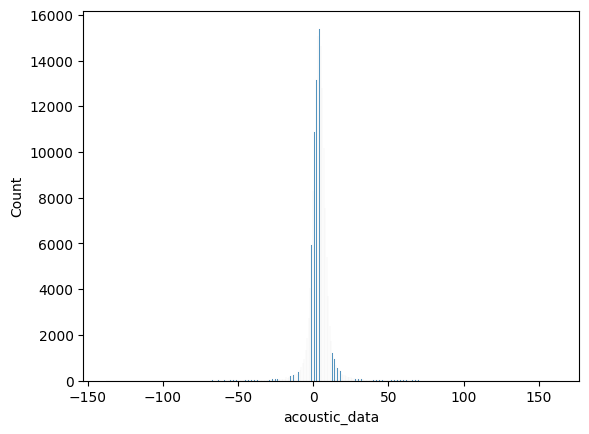

In [17]:
sns.histplot(test['acoustic_data'])

## Observation
#### 1) As we can see there is less outlier in our test data .
#### 2) And most major value occur between -10 to 20

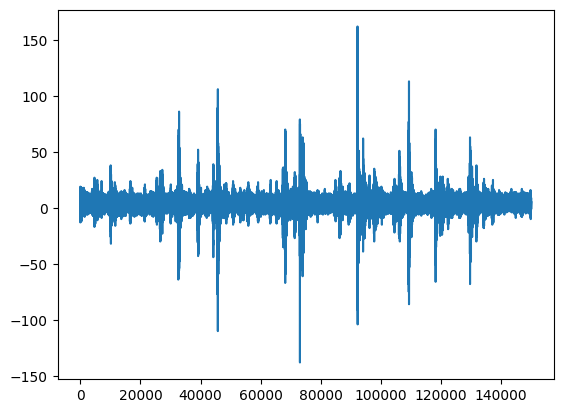

In [18]:
#https://www.geeksforgeeks.org/plotting-various-sounds-on-graphs-using-python-and-matplotlib/
plt.plot(test['acoustic_data'])

## Feature Engineering

### For performing feature engineering I take help from these 2 research paper (https://www.irjet.net/archives/V8/i5/IRJET-V8I5574.pdf, https://www.mdpi.com/1424-8220/20/15/4228) and try to take all features mention in that paper.

In [119]:
seg = 629145480//150000    #I take segment size 1.5 Lack because in test data we have 1.5 lack rows in each file and in submattion file we have to single file and predict the single target value based on 1.5 lack data

In [120]:
index = [i for i in range(seg)]

In [121]:
Data = pd.DataFrame(index = index, columns=['Min','SWD_Min','Real_FFT_Min','Imag_FFT_Min', 'Max','SWD_Max','Real_FFT_Max','Imag_FFT_Max', 'Mean','SWD_Mean','Real_FFT_Mean','Imag_FFT_Mean', 'Median', 'Std','SWD_Std','Real_FFT_Std','Imag_FFT_Std', 'Kurtosis', 'Skew','IQR', 'Abs_Mean', 'Abs_Std', '25%', '50%', '75%', '90%', '95%', '99%', 'Var_Roll_100', 'Avg_Roll_100', 'Min_Roll_100', 'Abs_Mean_Roll_100', '1%_Roll_100', '5%_Roll_100', '10%_Roll_100', '90%_Roll_100', '95%_Roll_100', '99%_Roll_100', 'Var_Roll_1000', 'Avg_Roll_1000', 'Min_Roll_1000', 'Abs_Mean_Roll_1000', '1%_Roll_1000', '5%_Roll_1000', '10%_Roll_1000', '90%_Roll_1000', '95%_Roll_1000', '99%_Roll_1000', 'Var_Roll_10000', 'Avg_Roll_10000', 'Min_Roll_10000', 'Abs_Mean_Roll_10000', '1%_Roll_10000', '5%_Roll_10000', '10%_Roll_10000', '90%_Roll_10000', '95%_Roll_10000', '99%_Roll_10000'])
Target = pd.DataFrame(index = index, columns = ['time_to_failure'])

In [122]:
for i in tqdm(range(seg)):
    X = train['acoustic_data'][i*150000:(i*150000)+150000]   #this will select 1.5 lack data in each itteration 
    Y = train['time_to_failure'][i*150000:(i*150000)+150000]
    
    Target['time_to_failure'][i] = Y[(i*150000)+150000-1]
    
    #Fast Fourier Transform
    ff_trans = fft(X)            #https://docs.scipy.org/doc/scipy/tutorial/fft.html
    
    #In Fast Fourier Transform we have real and imaginory data so with the help of numpy we distribute these data
    real_FFT = np.real(ff_trans)    #https://numpy.org/doc/stable/reference/generated/numpy.real.html
    imag_FFT = np.imag(ff_trans)    #https://numpy.org/doc/stable/reference/generated/numpy.imag.html
    
    #Spectral Welch Density
    f, Pxx_den = signal.welch(X)    #https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.welch.html
    # f : Array of sample frequencies.
    # Pxx_den : Power spectral density or power spectrum of x.
    
    Data['Min'][i] = X.min()
    Data['SWD_Min'][i] = Pxx_den.min()
    Data['Real_FFT_Min'][i] = real_FFT.min()
    Data['Imag_FFT_Min'][i] = imag_FFT.min()
    
    Data['Max'][i] = X.max()
    Data['SWD_Max'][i] = Pxx_den.max()
    Data['Real_FFT_Max'][i] = real_FFT.max()
    Data['Imag_FFT_Max'][i] = imag_FFT.max()
    
    Data['Mean'][i] = X.mean()
    Data['SWD_Mean'][i] = Pxx_den.mean()
    Data['Real_FFT_Mean'][i] = real_FFT.mean()
    Data['Imag_FFT_Mean'][i] = imag_FFT.mean()
    
    Data['Median'][i] = X.median()
    
    Data['Std'][i] = X.std()
    Data['SWD_Std'][i] = Pxx_den.std()
    Data['Real_FFT_Std'][i] = real_FFT.std()
    Data['Imag_FFT_Std'][i] = imag_FFT.std()
    
    Data['Kurtosis'][i] = X.kurtosis()
    
    Data['Skew'][i] = X.skew()                                  #https://www.w3schools.com/python/pandas/ref_df_skew.asp#:~:text=Definition%20and%20Usage,the%20skew%20of%20each%20row.
    
    Data['IQR'][i] = stats.iqr(X, interpolation = 'midpoint')   #https://www.geeksforgeeks.org/interquartile-range-and-quartile-deviation-using-numpy-and-scipy/
    
    Data['Abs_Mean'][i] = np.abs(X).mean()
    
    Data['Abs_Std'][i] = np.abs(X).std()
    
    Data['25%'][i] = X.quantile(0.25)                       #https://www.geeksforgeeks.org/python-pandas-dataframe-quantile/
    Data['50%'][i] = X.quantile(0.5)                        
    Data['75%'][i] = X.quantile(0.75)    
    Data['90%'][i] = X.quantile(0.90) 
    Data['95%'][i] = X.quantile(0.95) 
    Data['99%'][i] = X.quantile(0.99) 
    
    for j in [100,1000,10000]:    #this will select window size as mention in the research paper
        #As mention in the research paper we have to take standard deviation of rolling window
        #And I observe that after standard deviation it have null values so I drop all none value to get right min and mean values.
        Roll = X.rolling(j).std().dropna().values          #https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html
        
        Data['Var_Roll_'+str(j)][i] = variance(Roll)       #https://www.geeksforgeeks.org/python-statistics-variance/
        
        Data['Avg_Roll_'+str(j)][i] = Roll.mean()
        Data['Min_Roll_'+str(j)][i] = Roll.min()
        Data['Abs_Mean_Roll_'+str(j)][i] = np.abs(Roll).mean()
        Data['1%_Roll_'+str(j)][i] = np.quantile(Roll, 0.01)          #https://numpy.org/doc/stable/reference/generated/numpy.quantile.html
        Data['5%_Roll_'+str(j)][i] = np.quantile(Roll, 0.05)          #https://www.geeksforgeeks.org/numpy-quantile-in-python/
        Data['10%_Roll_'+str(j)][i] = np.quantile(Roll, 0.10)
        Data['90%_Roll_'+str(j)][i] = np.quantile(Roll, 0.90)
        Data['95%_Roll_'+str(j)][i] = np.quantile(Roll, 0.95)
        Data['99%_Roll_'+str(j)][i] = np.quantile(Roll, 0.99)
              

100%|████████████████████████████████████████████████████████████████████████████| 4194/4194 [2:50:26<00:00,  2.44s/it]


In [124]:
Data.to_csv('Data.csv', index=False)
Target.to_csv('Target.csv', index=False)

In [125]:
Data = pd.read_csv('Data.csv')
Target = pd.read_csv('Target.csv')

In [126]:
Data

,Min,SWD_Min,Real_FFT_Min,Imag_FFT_Min,Max,SWD_Max,Real_FFT_Max,Imag_FFT_Max,Mean,SWD_Mean,...,Var_Roll_10000,Avg_Roll_10000,Min_Roll_10000,Abs_Mean_Roll_10000,1%_Roll_10000,5%_Roll_10000,10%_Roll_10000,90%_Roll_10000,95%_Roll_10000,99%_Roll_10000
0,-98,2.208628,-20121.154171,-23432.719433,104,1039.275736,732617.0,23432.719433,4.884113,51.986139,...,1.488245,4.431413,2.967227,4.431413,2.996281,3.215820,3.330019,5.220809,5.714547,11.092520
1,-154,2.261655,-31056.675076,-27236.180586,181,1889.622403,708865.0,27236.180586,4.725767,85.327728,...,9.022337,6.046480,2.927364,6.046480,2.938750,3.210603,3.336463,12.435734,13.065962,13.161216
2,-106,2.205778,-27654.557067,-30073.497066,140,2005.313966,735959.0,30073.497066,4.906393,95.947074,...,6.711067,6.324556,2.910946,6.324556,2.935781,3.321943,3.602466,10.143116,12.105415,14.301914
3,-199,2.318524,-25622.393604,-27380.321471,197,1938.509028,735336.0,27380.321471,4.902240,96.098523,...,12.568907,6.102270,3.054492,6.102270,3.105110,3.304691,3.431388,8.358638,17.451363,17.502398
4,-126,2.360630,-26271.075117,-27503.045280,145,1434.847536,736308.0,27503.045280,4.908720,105.962701,...,12.897299,6.314026,2.961059,6.314026,2.976511,3.046676,3.394381,11.075241,16.150095,16.510595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4189,-61,2.248021,-11476.255992,-12513.404140,76,405.589637,666952.0,12513.404140,4.446347,27.263576,...,0.441927,3.395159,2.622951,3.395159,2.631827,2.678578,2.783187,4.092579,5.175578,5.236253
4190,-60,2.446389,-18130.001657,-12580.819686,82,446.154699,662069.0,12580.819686,4.413793,30.522276,...,1.352407,3.786946,2.695299,3.786946,2.708719,2.722891,2.758051,5.752785,5.785309,6.035477
4191,-39,2.282487,-13355.685378,-8441.990516,63,185.698570,691080.0,8441.990516,4.607200,20.524882,...,0.242266,3.199095,2.658612,3.199095,2.668803,2.690775,2.719674,4.044819,4.059927,4.192546
4192,-97,2.185050,-17011.255638,-17213.655176,94,738.408508,669792.0,17213.655176,4.465280,33.457384,...,2.289873,3.750431,2.658483,3.750431,2.666550,2.676143,2.689235,5.759285,8.509628,8.554167


In [127]:
Target

,time_to_failure
0,1.430797
1,1.391499
2,1.353196
3,1.313798
4,1.274400
...,...
4189,9.926798
4190,9.887500
4191,9.849197
4192,9.809799


### Loading Required libaries

In [128]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error 
from sklearn.svm import SVR
import lightgbm as lgb 
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Ridge
from sklearn.decomposition import PCA

### Standarization

In [188]:
scaler = StandardScaler()
scaler.fit(Data)
X_train_scaled = pd.DataFrame(scaler.transform(Data), columns=Data.columns)

In [189]:
X_train_scaled

,Min,SWD_Min,Real_FFT_Min,Imag_FFT_Min,Max,SWD_Max,Real_FFT_Max,Imag_FFT_Max,Mean,SWD_Mean,...,Var_Roll_10000,Avg_Roll_10000,Min_Roll_10000,Abs_Mean_Roll_10000,1%_Roll_10000,5%_Roll_10000,10%_Roll_10000,90%_Roll_10000,95%_Roll_10000,99%_Roll_10000
0,0.193218,-0.761652,0.156736,0.085419,-0.218194,-0.079257,1.424140,-0.085419,1.424140,-0.080484,...,-0.075728,-0.316126,0.214505,-0.316126,0.094451,0.239306,0.124102,-0.527676,-0.260035,-0.117230
1,-0.018037,-0.274848,-0.222118,-0.042859,0.063936,-0.057610,0.805716,0.042859,0.805716,-0.065211,...,-0.068192,0.146370,0.056884,0.146370,-0.103131,0.225928,0.137519,0.532690,-0.032871,-0.054265
2,0.163039,-0.787817,-0.104254,-0.138553,-0.086289,-0.054665,1.511155,0.138553,1.511155,-0.060346,...,-0.070504,0.226000,-0.008038,0.226000,-0.113328,0.511423,0.691353,0.195748,-0.062553,-0.019546
3,-0.187796,0.247219,-0.033851,-0.047721,0.122560,-0.056365,1.494934,0.047721,1.494934,-0.060277,...,-0.064644,0.162346,0.559566,0.162346,0.468210,0.467186,0.335159,-0.066514,0.102640,0.077868
4,0.087590,0.633760,-0.056324,-0.051860,-0.067969,-0.069187,1.520242,0.051860,1.520242,-0.055758,...,-0.064316,0.222985,0.190118,0.222985,0.026554,-0.194405,0.258109,0.332740,0.062430,0.047680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4189,0.332798,-0.400014,0.456233,0.453691,-0.320786,-0.095388,-0.285562,-0.453691,-0.285562,-0.091809,...,-0.076774,-0.612871,-1.146811,-0.612871,-1.157218,-1.138268,-1.014435,-0.693490,-0.276689,-0.295478
4190,0.336570,1.421050,0.225718,0.451418,-0.298802,-0.094355,-0.412699,-0.451418,-0.412699,-0.090316,...,-0.075864,-0.500678,-0.860735,-0.500678,-0.893143,-1.024641,-1.066770,-0.449492,-0.257848,-0.271152
4191,0.415791,-0.083608,0.391121,0.591007,-0.368418,-0.100986,0.342653,-0.591007,0.342653,-0.094896,...,-0.076974,-0.669016,-1.005802,-0.669016,-1.030229,-1.106992,-1.146673,-0.700509,-0.311163,-0.327246
4192,0.196991,-0.978099,0.264477,0.295167,-0.254834,-0.086916,-0.211617,-0.295167,-0.211617,-0.088972,...,-0.074926,-0.511134,-1.006311,-0.511134,-1.037968,-1.144511,-1.210049,-0.448537,-0.173665,-0.194490


### Hyperparameter Tunning

In [190]:
param_dist = {"n_estimators":sp_randint(1,60),
              "max_depth": sp_randint(1,15),
              "min_samples_split": sp_randint(1,190),
              "min_samples_leaf": sp_randint(1,65)}

clf = RandomForestRegressor(random_state=25,n_jobs=-1)

#https://stackoverflow.com/questions/51527725/gridsearchcv-scoring-on-mean-absolute-error

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=5, cv=10, scoring='neg_mean_absolute_error', random_state=25, return_train_score = True)

rf_random.fit(X_train_scaled,Target.values.ravel())

print("Best Parameter {}\n Score {}".format(rf_random.best_params_, rf_random.best_score_))

Best Parameter {'max_depth': 5, 'min_samples_leaf': 63, 'min_samples_split': 144, 'n_estimators': 55}
 Score -2.2249510994696533


### Random Forest

In [191]:
clf = RandomForestRegressor(max_depth= rf_random.best_estimator_.max_depth,min_samples_leaf = rf_random.best_estimator_.min_samples_leaf,
                            min_samples_split = rf_random.best_estimator_.min_samples_split,
                            n_estimators= rf_random.best_estimator_.n_estimators, n_jobs=-1, random_state=25)

clf.fit(X_train_scaled,Target.values.ravel())

RandomForestRegressor(max_depth=5, min_samples_leaf=63, min_samples_split=144,
                      n_estimators=55, n_jobs=-1, random_state=25)

### MAE

In [192]:
y_pred = clf.predict(X_train_scaled)
test_mae = mean_absolute_error(Target.values.ravel(), y_pred) 
print(test_mae)

1.9760573854333796


### Feature Importance

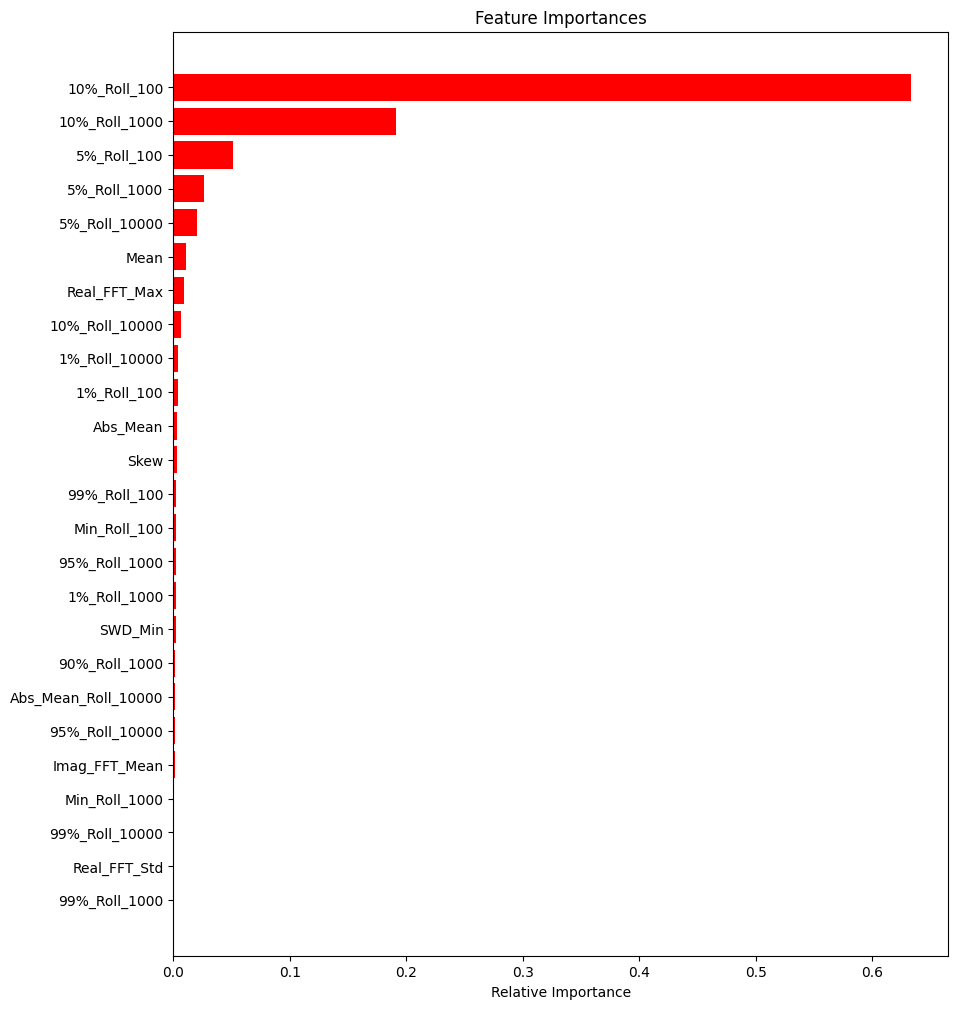

In [193]:
features = X_train_scaled.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### With Top Features

In [194]:
Top_Data = X_train_scaled[['10%_Roll_100','10%_Roll_1000', '5%_Roll_100', '5%_Roll_10000', '5%_Roll_1000', 'Mean', 'Real_FFT_Max', '10%_Roll_10000']]

In [195]:
Top_Data

,10%_Roll_100,10%_Roll_1000,5%_Roll_100,5%_Roll_10000,5%_Roll_1000,Mean,Real_FFT_Max,10%_Roll_10000
0,0.125037,0.185906,0.138030,0.239306,0.184599,1.424140,1.424140,0.124102
1,0.131754,-0.141342,0.141753,0.225928,-0.151082,0.805716,0.805716,0.137519
2,0.783366,0.666245,0.856220,0.511423,0.769589,1.511155,1.511155,0.691353
3,0.309285,0.210893,0.375361,0.467186,0.296334,1.494934,1.494934,0.335159
4,0.318174,0.366969,0.319221,-0.194405,0.319527,1.520242,1.520242,0.258109
...,...,...,...,...,...,...,...,...
4189,-1.171539,-1.133697,-1.113702,-1.138268,-1.186834,-0.285562,-0.285562,-1.014435
4190,-1.257608,-1.226826,-1.259487,-1.024641,-1.301656,-0.412699,-0.412699,-1.066770
4191,-1.475390,-1.235227,-1.537123,-1.106992,-1.344652,0.342653,0.342653,-1.146673
4192,-1.070285,-1.013170,-1.044627,-1.144511,-0.975015,-0.211617,-0.211617,-1.210049


## Splitting Time Series Data

In [196]:
#https://medium.com/@Stan_DS/timeseries-split-with-sklearn-tips-8162c83612b9
tscv = TimeSeriesSplit(n_splits = 3)
for train_index, test_index in tscv.split(Top_Data):
    X_train, X_test = Top_Data.iloc[train_index, :], Top_Data.iloc[test_index,:]
    y_train, y_test = Target.iloc[train_index], Target.iloc[test_index]

In [197]:
X_train

,10%_Roll_100,10%_Roll_1000,5%_Roll_100,5%_Roll_10000,5%_Roll_1000,Mean,Real_FFT_Max,10%_Roll_10000
0,0.125037,0.185906,0.138030,0.239306,0.184599,1.424140,1.424140,0.124102
1,0.131754,-0.141342,0.141753,0.225928,-0.151082,0.805716,0.805716,0.137519
2,0.783366,0.666245,0.856220,0.511423,0.769589,1.511155,1.511155,0.691353
3,0.309285,0.210893,0.375361,0.467186,0.296334,1.494934,1.494934,0.335159
4,0.318174,0.366969,0.319221,-0.194405,0.319527,1.520242,1.520242,0.258109
...,...,...,...,...,...,...,...,...
3141,-0.676534,-0.685005,-0.630230,-0.871666,-0.772602,0.871329,0.871329,-0.905756
3142,-0.831381,-0.731743,-0.893470,-1.014915,-0.702579,0.625750,0.625750,-0.966845
3143,-0.718243,-0.792571,-0.746032,-0.967933,-0.853423,1.875565,1.875565,-0.871276
3144,-0.255827,-0.419226,-0.221755,-0.437901,-0.467388,1.361418,1.361418,-0.213924


### XGBoost

### Hyperparameter Tunning

In [198]:
param_dist = {'max_depth': sp_randint(3,60),
              'n_estimators': sp_randint(1,20)}

clf = xgb.XGBRegressor(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,cv=3,scoring='neg_mean_absolute_error',random_state=25,return_train_score = True)

rf_random.fit(X_train,y_train.values.ravel())

print("Best Parameter {}\n Score {}".format(rf_random.best_params_, rf_random.best_score_))

Best Parameter {'max_depth': 4, 'n_estimators': 8}
 Score -2.146826828276016


In [199]:
#https://stackoverflow.com/questions/38556983/xgboost-increasing-training-error-mae
Model_Best1 = xgb.XGBRegressor(max_depth= rf_random.best_estimator_.max_depth, n_estimators= rf_random.best_estimator_.n_estimators, eval_metric='mae') 

Model_Best1.fit(X_train, y_train.values.ravel())

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric='mae', gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=8, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

### MAE

In [200]:
y_pred = Model_Best1.predict(X_test)

test_mae1 = mean_absolute_error(y_test, y_pred) 
print(test_mae1)

2.3637163990259995


### Support Vector Regressor

### Hyperparameter Tunning

In [201]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 

clf = SVR(kernel="linear")

rf_random = RandomizedSearchCV(clf, param_distributions=param_grid,cv=3,scoring='neg_mean_absolute_error',random_state=25,return_train_score = True)

rf_random.fit(X_train,y_train.values.ravel())

print("Best Parameter {}\n Score {}".format(rf_random.best_params_, rf_random.best_score_))

Best Parameter {'kernel': 'rbf', 'gamma': 0.01, 'C': 0.1}
 Score -2.1512132583307464


In [202]:
#https://stackoverflow.com/questions/38556983/xgboost-increasing-training-error-mae
Model_Best2 = SVR(kernel = rf_random.best_estimator_.kernel, gamma = rf_random.best_estimator_.gamma, C = rf_random.best_estimator_.C) 

Model_Best2.fit(X_train, y_train.values.ravel())

SVR(C=0.1, gamma=0.01)

### MAE

In [203]:
y_pred = Model_Best2.predict(X_test)

test_mae2 = mean_absolute_error(y_test, y_pred) 
print(test_mae2)

2.1728025110871365


### LGB

### Hyperparameter Tunning

In [204]:
parameters = { 'n_estimators': [5, 10, 50], 'max_depth': [1, 5, 10]}  

clf = lgb.LGBMRegressor(n_jobs=-1) 


rf_random = GridSearchCV(clf, parameters,scoring='neg_mean_absolute_error')

rf_random.fit(X_train,y_train.values.ravel())

print("Best Parameter {}\n Score {}".format(rf_random.best_params_, rf_random.best_score_))

Best Parameter {'max_depth': 1, 'n_estimators': 50}
 Score -2.1336765949857215


In [205]:
#https://stackoverflow.com/questions/38556983/xgboost-increasing-training-error-mae
Model_Best3 = lgb.LGBMRegressor(max_depth= rf_random.best_estimator_.max_depth, n_estimators= rf_random.best_estimator_.n_estimators, eval_metric='mae') 

Model_Best3.fit(X_train, y_train.values.ravel())

LGBMRegressor(eval_metric='mae', max_depth=1, n_estimators=50)

### MAE

In [206]:
y_pred = Model_Best3.predict(X_test)

test_mae3 = mean_absolute_error(y_test, y_pred) 
print(test_mae3)

2.231172991420581


### AdaBoost Regressor

### Hyperparameter Tunning

In [207]:
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html
params = {"n_estimators":sp_randint(100,1000),
          "loss" : ['linear', 'square', 'exponential']} 

clf = AdaBoostRegressor() 

rf_random = RandomizedSearchCV(clf, param_distributions=params,cv=3,scoring='neg_mean_absolute_error',random_state=25,return_train_score = True)

rf_random.fit(X_train,y_train.values.ravel())

print("Best Parameter {}\n Score {}".format(rf_random.best_params_, rf_random.best_score_))

Best Parameter {'loss': 'linear', 'n_estimators': 256}
 Score -2.143131391002577


In [208]:
Model_Best4 = AdaBoostRegressor(n_estimators= rf_random.best_estimator_.n_estimators, loss = rf_random.best_estimator_.loss, random_state=25)
Model_Best4.fit(X_train,y_train.values.ravel())

AdaBoostRegressor(n_estimators=256, random_state=25)

### MAE

In [209]:
y_pred = Model_Best4.predict(X_test)

test_mae4 = mean_absolute_error(y_test, y_pred) 
print(test_mae4)


2.4046131891866307


## With All Features

## Splitting Time Series Data

In [210]:
#https://medium.com/@Stan_DS/timeseries-split-with-sklearn-tips-8162c83612b9
tscv = TimeSeriesSplit(n_splits = 3)
for train_index, test_index in tscv.split(X_train_scaled):
    X_train, X_test = X_train_scaled.iloc[train_index, :], X_train_scaled.iloc[test_index,:]
    y_train, y_test = Target.iloc[train_index], Target.iloc[test_index]

In [211]:
X_train

,Min,SWD_Min,Real_FFT_Min,Imag_FFT_Min,Max,SWD_Max,Real_FFT_Max,Imag_FFT_Max,Mean,SWD_Mean,...,Var_Roll_10000,Avg_Roll_10000,Min_Roll_10000,Abs_Mean_Roll_10000,1%_Roll_10000,5%_Roll_10000,10%_Roll_10000,90%_Roll_10000,95%_Roll_10000,99%_Roll_10000
0,0.193218,-0.761652,0.156736,0.085419,-0.218194,-0.079257,1.424140,-0.085419,1.424140,-0.080484,...,-0.075728,-0.316126,0.214505,-0.316126,0.094451,0.239306,0.124102,-0.527676,-0.260035,-0.117230
1,-0.018037,-0.274848,-0.222118,-0.042859,0.063936,-0.057610,0.805716,0.042859,0.805716,-0.065211,...,-0.068192,0.146370,0.056884,0.146370,-0.103131,0.225928,0.137519,0.532690,-0.032871,-0.054265
2,0.163039,-0.787817,-0.104254,-0.138553,-0.086289,-0.054665,1.511155,0.138553,1.511155,-0.060346,...,-0.070504,0.226000,-0.008038,0.226000,-0.113328,0.511423,0.691353,0.195748,-0.062553,-0.019546
3,-0.187796,0.247219,-0.033851,-0.047721,0.122560,-0.056365,1.494934,0.047721,1.494934,-0.060277,...,-0.064644,0.162346,0.559566,0.162346,0.468210,0.467186,0.335159,-0.066514,0.102640,0.077868
4,0.087590,0.633760,-0.056324,-0.051860,-0.067969,-0.069187,1.520242,0.051860,1.520242,-0.055758,...,-0.064316,0.222985,0.190118,0.222985,0.026554,-0.194405,0.258109,0.332740,0.062430,0.047680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3141,0.359205,1.223910,0.325114,0.221192,-0.302466,-0.093022,0.871329,-0.221192,0.871329,-0.088813,...,-0.075868,-0.461936,-0.737784,-0.461936,-0.750818,-0.871666,-0.905756,-0.441018,-0.241229,-0.250008
3142,-0.372645,1.186725,0.060450,0.032664,0.360722,-0.060982,0.625750,-0.032664,0.625750,-0.066758,...,-0.061809,-0.111200,-0.908770,-0.111200,-0.919940,-1.014915,-0.966845,-0.433471,0.144246,0.122774
3143,-0.184024,1.324257,-0.329613,-0.169508,0.214161,-0.052561,1.875565,0.169508,1.875565,-0.067184,...,-0.064582,0.005388,-1.052696,0.005388,-0.981612,-0.967933,-0.871276,0.648489,0.010947,-0.012050
3144,-0.018037,0.005139,-0.222209,0.010949,-0.126593,-0.067976,1.361418,-0.010949,1.361418,-0.069766,...,-0.069397,0.040850,-0.226131,0.040850,-0.302357,-0.437901,-0.213924,0.206090,-0.084845,-0.038555


## XGB Regressor

### Hyperparameter Tunning

In [212]:
param_dist = {'max_depth': sp_randint(3,60),
              'n_estimators': sp_randint(1,20)}

clf = xgb.XGBRegressor(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,cv=3,scoring='neg_mean_absolute_error',random_state=25,return_train_score = True)

rf_random.fit(X_train,y_train.values.ravel())

print("Best Parameter {}\n Score {}".format(rf_random.best_params_, rf_random.best_score_))

Best Parameter {'max_depth': 4, 'n_estimators': 8}
 Score -2.169322276041964


In [213]:
#https://stackoverflow.com/questions/38556983/xgboost-increasing-training-error-mae
Model_all_Best1 = xgb.XGBRegressor(max_depth= rf_random.best_estimator_.max_depth, n_estimators= rf_random.best_estimator_.n_estimators, eval_metric='mae') 

Model_all_Best1.fit(X_train, y_train.values.ravel())

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric='mae', gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=8, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

### MAE

In [214]:
y_pred = Model_all_Best1.predict(X_test)

test_mae_all1 = mean_absolute_error(y_test, y_pred) 
print(test_mae_all1)

2.341876603438909


### Support Vector Regressor

### Hyperparameter Tunning

In [215]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 

clf = SVR(kernel="linear")

rf_random = RandomizedSearchCV(clf, param_distributions=param_grid,cv=3,scoring='neg_mean_absolute_error',random_state=25,return_train_score = True)

rf_random.fit(X_train,y_train.values.ravel())

print("Best Parameter {}\n Score {}".format(rf_random.best_params_, rf_random.best_score_))

Best Parameter {'kernel': 'rbf', 'gamma': 0.001, 'C': 10}
 Score -2.1493569404557533


In [216]:
#https://stackoverflow.com/questions/38556983/xgboost-increasing-training-error-mae
Model_all_Best2 = SVR(kernel = rf_random.best_estimator_.kernel, gamma = rf_random.best_estimator_.gamma, C = rf_random.best_estimator_.C) 

Model_all_Best2.fit(X_train, y_train.values.ravel())

SVR(C=10, gamma=0.001)

### MAE

In [217]:
y_pred = Model_all_Best2.predict(X_test)

test_mae_all2 = mean_absolute_error(y_test, y_pred) 
print(test_mae_all2)

2.2416251209020475


### LGB

### Hyperparameter Tunning

In [218]:
parameters = { 'n_estimators': [5, 10, 50], 'max_depth': [1, 5, 10]}  

clf = lgb.LGBMRegressor(n_jobs=-1) 


rf_random = GridSearchCV(clf, parameters,scoring='neg_mean_absolute_error')

rf_random.fit(X_train,y_train.values.ravel())

print("Best Parameter {}\n Score {}".format(rf_random.best_params_, rf_random.best_score_))

Best Parameter {'max_depth': 1, 'n_estimators': 50}
 Score -2.1543482663050395


In [219]:
#https://stackoverflow.com/questions/38556983/xgboost-increasing-training-error-mae
Model_all_Best3 = lgb.LGBMRegressor(max_depth= rf_random.best_estimator_.max_depth, n_estimators= rf_random.best_estimator_.n_estimators, eval_metric='mae') 

Model_all_Best3.fit(X_train, y_train.values.ravel())

LGBMRegressor(eval_metric='mae', max_depth=1, n_estimators=50)

### MAE

In [220]:
y_pred = Model_all_Best3.predict(X_test)

test_mae_all3 = mean_absolute_error(y_test, y_pred) 
print(test_mae_all3)

2.278750386298614


### AdaBoost Regressor

### Hyperparameter Tunning

In [221]:
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html
params = {"n_estimators":sp_randint(100,1000),
          "loss" : ['linear', 'square', 'exponential']} 

clf = AdaBoostRegressor() 

rf_random = RandomizedSearchCV(clf, param_distributions=params,cv=3,scoring='neg_mean_absolute_error',random_state=25,return_train_score = True)

rf_random.fit(X_train,y_train.values.ravel())

print("Best Parameter {}\n Score {}".format(rf_random.best_params_, rf_random.best_score_))

Best Parameter {'loss': 'linear', 'n_estimators': 256}
 Score -2.2943451510389683


In [222]:
Model_all_Best4 = AdaBoostRegressor(n_estimators= rf_random.best_estimator_.n_estimators, loss = rf_random.best_estimator_.loss, random_state=25)
Model_all_Best4.fit(X_train,y_train.values.ravel())

AdaBoostRegressor(n_estimators=256, random_state=25)

### MAE

In [223]:
y_pred = Model_all_Best4.predict(X_test)

test_mae_all4 = mean_absolute_error(y_test, y_pred) 
print(test_mae_all4)


2.529421651170179


### Plotting All Model MAE

In [224]:
from prettytable import PrettyTable
x = PrettyTable()

In [225]:
x.field_names = ["Features", "Model", "MAE"]  #https://pypi.org/project/prettytable/
x.add_row(["Top_Features", "XGB", test_mae1])
x.add_row(["Top_Features", "SVR", test_mae2])
x.add_row(["Top_Features", "LGB", test_mae3])
x.add_row(["Top_Features", "AdaBoost", test_mae4])

x.add_row(["All_Features", "XGB", test_mae_all1])
x.add_row(["All_Features", "SVR", test_mae_all2])
x.add_row(["All_Features", "LGB", test_mae_all3])
x.add_row(["All_Features", "AdaBoost", test_mae_all4])


print(x)

+--------------+----------+--------------------+
|   Features   |  Model   |        MAE         |
+--------------+----------+--------------------+
| Top_Features |   XGB    | 2.3637163990259995 |
| Top_Features |   SVR    | 2.1728025110871365 |
| Top_Features |   LGB    | 2.231172991420581  |
| Top_Features | AdaBoost | 2.4046131891866307 |
| All_Features |   XGB    | 2.341876603438909  |
| All_Features |   SVR    | 2.2416251209020475 |
| All_Features |   LGB    | 2.278750386298614  |
| All_Features | AdaBoost | 2.529421651170179  |
+--------------+----------+--------------------+


In [226]:
import pickle

filename = 'final_Best_Model.sav'
filename2 = 'Standard_scalar.sav'
pickle.dump(Model_Best2, open(filename, 'wb'))
pickle.dump(scaler, open(filename2, 'wb'))

## Observation
### From the above table we can see that SVR with Top Features have lowest MAE